In [24]:
# 필요한 라이브러리 설치
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
%matplotlib inline
import requests
import scipy.stats as stats
from matplotlib import font_manager

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

# 나눔고딕 폰트 다운로드
url = "https://github.com/google/fonts/raw/main/ofl/nanumgothic/NanumGothic-Regular.ttf"
response = requests.get(url)

# 다운로드한 폰트를 파일로 저장
with open("NanumGothic.ttf", "wb") as f:
    f.write(response.content)

# 폰트 설치
font_manager.fontManager.addfont('NanumGothic.ttf')
plt.rc('font', family='NanumGothic')

In [25]:
# 데이터(데이터프레임) 읽어오기
data = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='unicode_escape', sep=',')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [27]:
# 상품 카테고리 재분류 결과 병합
categories = pd.read_csv('Product_categories_ver2.csv', encoding='utf-8', sep='\t')
categories.head()

,Product Name,Category Name
0,adidas Brazuca 2014 Official Match Ball,Sports Equipment
1,adidas Kids' F5 Messi FG Soccer Cleat,Sports Equipment
2,adidas Men's F10 Messi TRX FG Soccer Cleat,Sports Equipment
3,adidas Men's Germany Black Crest Away Tee,Sports Equipment
4,adidas Youth Germany Black/Red Away Match Soc,Sports Equipment


In [28]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product Name   118 non-null    object
 1   Category Name  118 non-null    object
dtypes: object(2)
memory usage: 2.0+ KB


In [29]:
# 필요없는 컬럼 제거 후 데이터 재확인
data.drop(columns=['Customer Email', 
                   'Customer Password', 
                   'Customer Fname', 
                   'Customer Lname', 
                   'Product Description', 
                   'Product Image', 
                   'Product Status',
                   'Order Item Cardprod Id'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Id                    180519 non-null  int64  
 12  Customer Segment              

In [30]:
# order date와 shipping date의 dtype을 datetime으로 변경
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
data['shipping date (DateOrders)'] = pd.to_datetime(data['shipping date (DateOrders)'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  object        
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

In [31]:
# 타입이 정상적으로 변환되었는지 head()로 데이터 확인
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,Smart watch,327.75,2018-02-03 22:56:00,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-13 12:27:00,75939,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,Smart watch,327.75,2018-01-18 12:27:00,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,2018-01-13 12:06:00,75938,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,Smart watch,327.75,2018-01-17 12:06:00,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-13 11:45:00,75937,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,Smart watch,327.75,2018-01-16 11:45:00,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,2018-01-13 11:24:00,75936,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,Smart watch,327.75,2018-01-15 11:24:00,Standard Class


In [32]:
data.describe(include='all').round(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
count,180519,180519.000,180519.000,180519.000,180519.000,180519,180519.000,180519.000,180519,180519,180519,180519.000,180519,180519,180519,180516.000,180519.000,180519,180519.000,180519.000,180519,180519,180519,180519.000,180519,180519.000,180519.000,180519.000,180519.000,180519.000,180519.000,180519.000,180519.000,180519.000,180519.000,180519,180519,180519,24840.000,180519.000,180519.000,180519,180519.000,180519,180519
unique,4,NaN,NaN,NaN,NaN,4,NaN,NaN,50,563,2,NaN,3,46,7458,NaN,NaN,11,NaN,NaN,5,3597,164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1089,9,NaN,NaN,NaN,118,NaN,NaN,4
top,DEBIT,NaN,NaN,NaN,NaN,Late delivery,NaN,NaN,Cleats,Caguas,EE. UU.,NaN,Consumer,PR,9126 Wishing Expressway,NaN,NaN,Fan Shop,NaN,NaN,LATAM,Santo Domingo,Estados Unidos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central America,Inglaterra,COMPLETE,NaN,NaN,NaN,Perfect Fitness Perfect Rip Deck,NaN,NaN,Standard Class
freq,69295,NaN,NaN,NaN,NaN,98977,NaN,NaN,24551,66770,111146,NaN,93504,69373,122,NaN,NaN,66861,NaN,NaN,51594,2211,24840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28341,6722,59491,NaN,NaN,NaN,24515,NaN,NaN,107752
mean,NaN,3.498,2.932,21.975,183.108,NaN,0.548,31.851,NaN,NaN,NaN,6691.379,NaN,NaN,NaN,35921.127,5.443,NaN,29.720,-84.916,NaN,NaN,NaN,6691.379,2016-06-12 17:47:04.669868544,36221.895,20.665,0.102,90260.000,141.233,0.121,2.128,203.772,183.108,21.975,NaN,NaN,NaN,55426.132,692.510,31.851,NaN,141.233,2016-06-16 05:45:23.202433024,NaN
min,NaN,0.000,0.000,-4274.980,7.490,NaN,0.000,2.000,NaN,NaN,NaN,1.000,NaN,NaN,NaN,603.000,2.000,NaN,-33.938,-158.026,NaN,NaN,NaN,1.000,2015-01-01 00:00:00,1.000,0.000,0.000,1.000,9.990,-2.750,1.000,9.990,7.490,-4274.980,NaN,NaN,NaN,1040.000,19.000,2.000,NaN,9.990,2015-01-03 00:00:00,NaN
25%,NaN,2.000,2.000,7.000,104.380,NaN,0.000,18.000,NaN,NaN,NaN,3258.500,NaN,NaN,NaN,725.000,4.000,NaN,18.265,-98.446,NaN,NaN,NaN,3258.500,2015-09-21 13:49:00,18057.000,5.400,0.040,45130.500,50.000,0.080,1.000,119.980,104.380,7.000,NaN,NaN,NaN,23464.000,403.000,18.000,NaN,50.000,2015-09-25 06:59:00,NaN
50%,NaN,3.000,4.000,31.520,163.990,NaN,1.000,29.000,NaN,NaN,NaN,6457.000,NaN,NaN,NaN,19380.000,5.000,NaN,33.145,-76.848,NaN,NaN,NaN,6457.000,2016-06-11 13:06:00,36140.000,14.000,0.100,90260.000,59.990,0.270,1.000,199.920,163.990,31.520,NaN,NaN,NaN,59405.000,627.000,29.000,NaN,59.990,2016-06-15 08:32:00,NaN
75%,NaN,5.000,4.000,64.800,247.400,NaN,1.000,45.000,NaN,NaN,NaN,9779.000,NaN,NaN,NaN,78207.000,7.000,NaN,39.280,-66.371,NaN,NaN,NaN,9779.000,2017-03-01 08:42:00,54144.000,29.990,0.160,135389.500,199.990,0.360,3.000,299.950,247.400,64.800,NaN,NaN,NaN,90008.000,1004.000,45.000,NaN,199.990,2017-03-04 21:29:00,NaN
max,NaN,6.000,4.000,911.800,1939.990,NaN,1.000,76.000,NaN,NaN,NaN,20757.000,NaN,NaN,NaN,99205.000,12.000,NaN,48.782,115.263,NaN,NaN,NaN,20757.000,2018-01-31 23:38:00,77204.000,500.000,0.250,180519.000,1999.990,0.500,5.000,1999.990,1939.990,911.800,NaN,NaN,NaN,99301.000,1363.000,76.000,NaN,1999.990,2018-02-06 22:14:00,NaN


In [33]:
# 상품 카테고리별 count 확인
data['Category Name'].value_counts()

Category Name
Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Video Games               838
Children's Clothing       652
Women's Clothing          650
Baseball & Softball       632
Hockey                    614
Cameras                   592
Toys                      529
Golf Shoes                524
Pet Supplies              492
Garden                    484
Crafts                    484
DVDs                      483
Computers                 442
Golf Apparel              441
Hunting & Shooting        440
Music                     434
Consumer Electronics      431
Boxing & MMA              

In [34]:
# 스포츠 관련 용품 아닌 상품 카테고리는 정리 필요할 수도 있음

C:\Users\SSW\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.



<Figure size 900x600 with 0 Axes>

C:\Users\SSW\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.



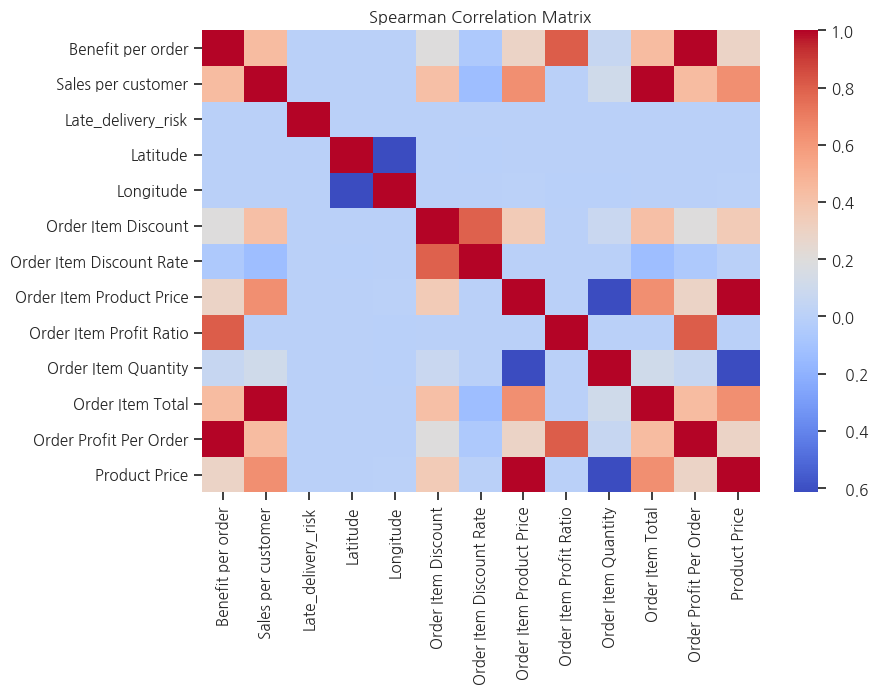

In [35]:
# 배송 지연 요인 식별을 위해 상관관계 분석(순서형 변수가 포함되어 있으므로 spearman 상관계수로)
# 수치형 변수중에서도 단순 Id나 zip코드는 제외
corr_matrix = data[['Benefit per order', 
                    'Sales per customer',
                    'Late_delivery_risk',
                    'Latitude',
                    'Longitude',
                    'Order Item Discount',
                    'Order Item Discount Rate',
                    'Order Item Product Price',
                    'Order Item Profit Ratio',
                    'Order Item Quantity',
                    'Order Item Total',
                    'Order Profit Per Order',
                    'Product Price']].corr(method='spearman')
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

Late_delivery_risk와 다른 변수와는 별다른 spearman 상관관계가 나타나지 않음.
point biserial(이분형-연속형)로 계산하면 다를 수도 있으니 AI의 도움을 받아 계산해봤음.

In [37]:
# Late_delivery_risk와 다른 수치형 변수 간의 point biserial 상관 계수 계산
# 수치형 변수중에서도 단순 Id나 zip코드는 제외
def calculate_point_biserial_correlation(data: pd.DataFrame, target_column: str, corr_list: list) -> dict:
    """
    이진 타겟 변수와 연속 변수 목록 간의 포인트 바이세리얼 상관관계를 계산합니다.
    
    Args:
    data (pd.DataFrame): 입력 데이터프레임.
    target_column (str): 이진 타겟 열의 이름.
    corr_list (list): 타겟 변수와 상관관계를 계산할 연속 변수 이름 목록.
    
    Returns:
    dict: 변수 이름을 키로 하고 해당 상관관계 값을 값으로 가지는 딕셔너리.
    """
    correlation_results = {}
    for i in corr_list:
        correlation, _ = stats.pointbiserialr(data[target_column].astype('bool'), data[i])
        correlation_results[i] = correlation
    return correlation_results

corr_list=['Benefit per order', 
                    'Sales per customer',
                    'Latitude',
                    'Longitude',
                    'Order Item Discount',
                    'Order Item Discount Rate',
                    'Order Item Product Price',
                    'Order Item Profit Ratio',
                    'Order Item Quantity',
                    'Order Item Total',
                    'Order Profit Per Order',
                    'Product Price']
correlation_results = calculate_point_biserial_correlation(data, 'Late_delivery_risk', corr_list)
pd.Series(correlation_results)

Benefit per order          -0.003727
Sales per customer         -0.003791
Latitude                    0.000679
Longitude                  -0.001915
Order Item Discount        -0.000750
Order Item Discount Rate    0.000404
Order Item Product Price   -0.002175
Order Item Profit Ratio    -0.002316
Order Item Quantity        -0.000139
Order Item Total           -0.003791
Order Profit Per Order     -0.003727
Product Price              -0.002175
dtype: float64

point biserial로 계산해도 유의미한 결과는 나오지 않음.
그렇다면 배송 지연일은 어떨까? Late_delivery_risk를 빼고 배송지연일을 넣어서 pearson 상관계수로 재산출하였음.

In [39]:
# 배송 지연 요인 식별을 위해 상관관계 분석
# 수치형 변수중에서도 단순 Id나 zip코드는 제외
corr_matrix = data[['Benefit per order', 
                    'Sales per customer',
                    'Late_delivery_risk',
                    'Latitude',
                    'Longitude',
                    'Order Item Discount',
                    'Order Item Discount Rate',
                    'Order Item Product Price',
                    'Order Item Profit Ratio',
                    'Order Item Quantity',
                    'Order Item Total',
                    'Order Profit Per Order',
                    'Product Price']].corr(method='spearman')


C:\Users\SSW\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.

C:\Users\SSW\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.



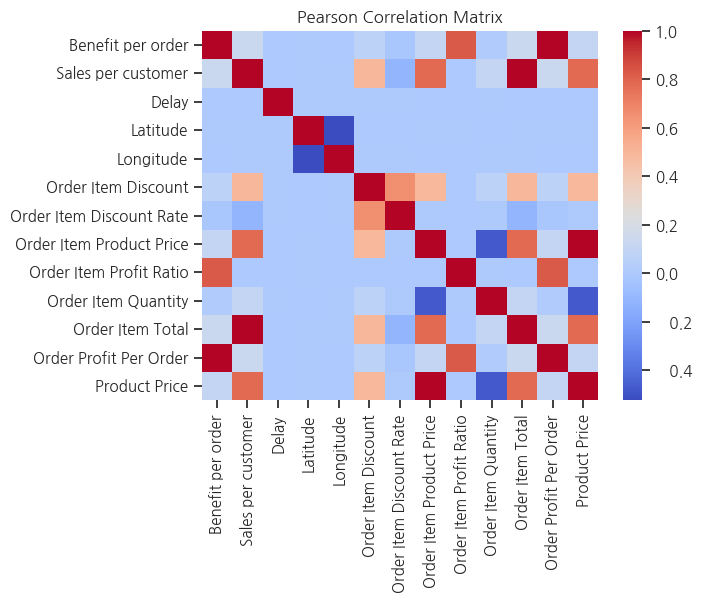

In [40]:
#'Days for shipping (real)과 Days for shipment (scheduled) 차이를 계산하여 배송 지연일 계산
data['Delay'] = data['Days for shipping (real)'] - data['Days for shipment (scheduled)']

corr_matrix = data[['Benefit per order', 
                    'Sales per customer',
                    'Delay',
                    'Latitude',
                    'Longitude',
                    'Order Item Discount',
                    'Order Item Discount Rate',
                    'Order Item Product Price',
                    'Order Item Profit Ratio',
                    'Order Item Quantity',
                    'Order Item Total',
                    'Order Profit Per Order',
                    'Product Price']].corr(method='pearson')
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

배송지연일로 계산해도 역시 별다른 차이가 나타나지 않음.
대부분의 수치형 변수가 가격이나 이윤과 연관되어 있는데,
그렇다면 배송거리나 제품 카테고리, 지역, 배송 유형 등의 다른 변수에서 배송 지연요인을 식별해야 함
(배송거리는 별도의 작업을 필요로 하므로 추후에 geopy 등을 통해 산출하여 살펴보기로 함)

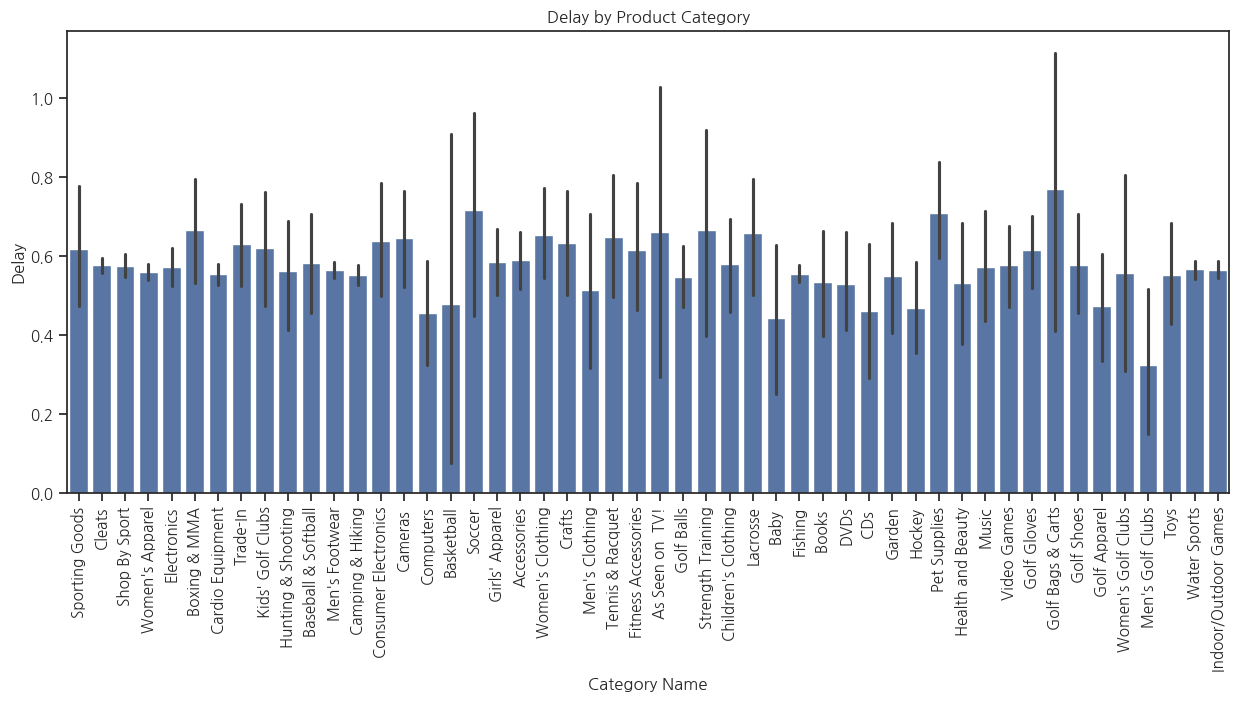

In [42]:
# 제품 카테고리별 배송 지연일 평균
plt.figure(figsize=(15, 6))
sns.barplot(x='Category Name', y='Delay', data=data)
plt.title('Delay by Product Category')
plt.xticks(rotation=90)

plt.show()

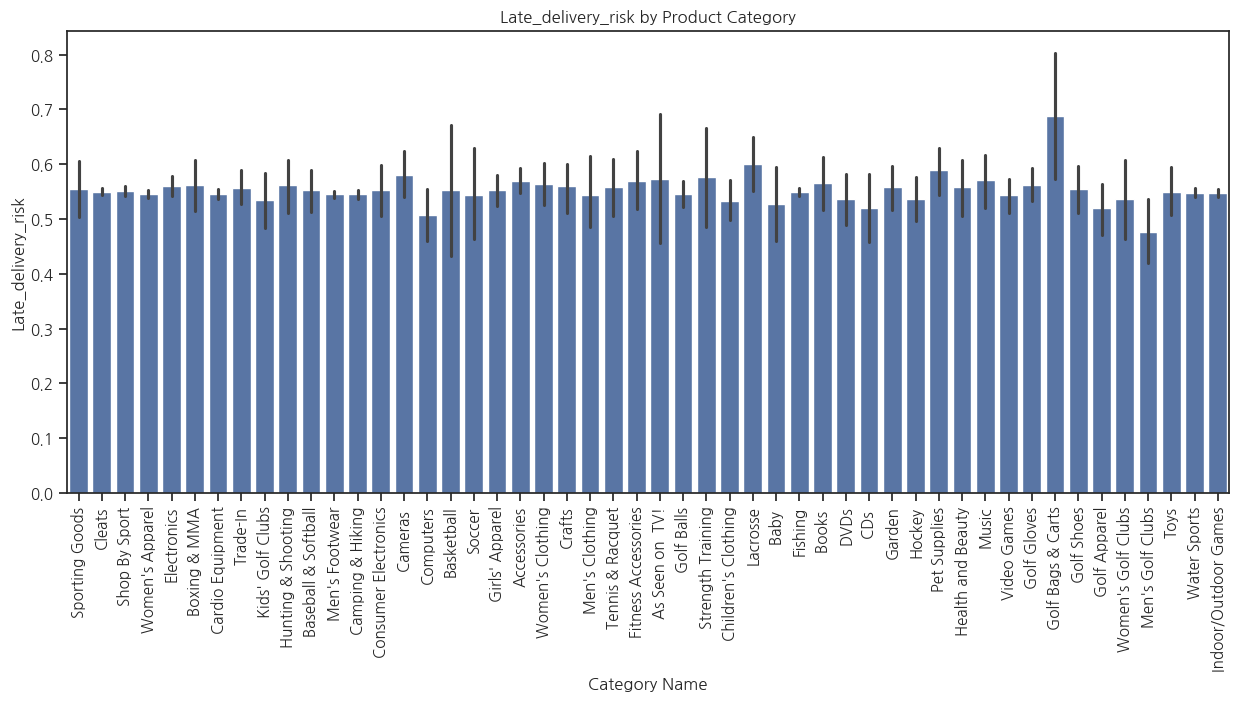

In [43]:
# 제품 카테고리별 배송 지연 비율(0에서 1)
plt.figure(figsize=(15, 6))
sns.barplot(x='Category Name', y='Late_delivery_risk', data=data)
plt.title('Late_delivery_risk by Product Category')
plt.xticks(rotation=90)

plt.show()

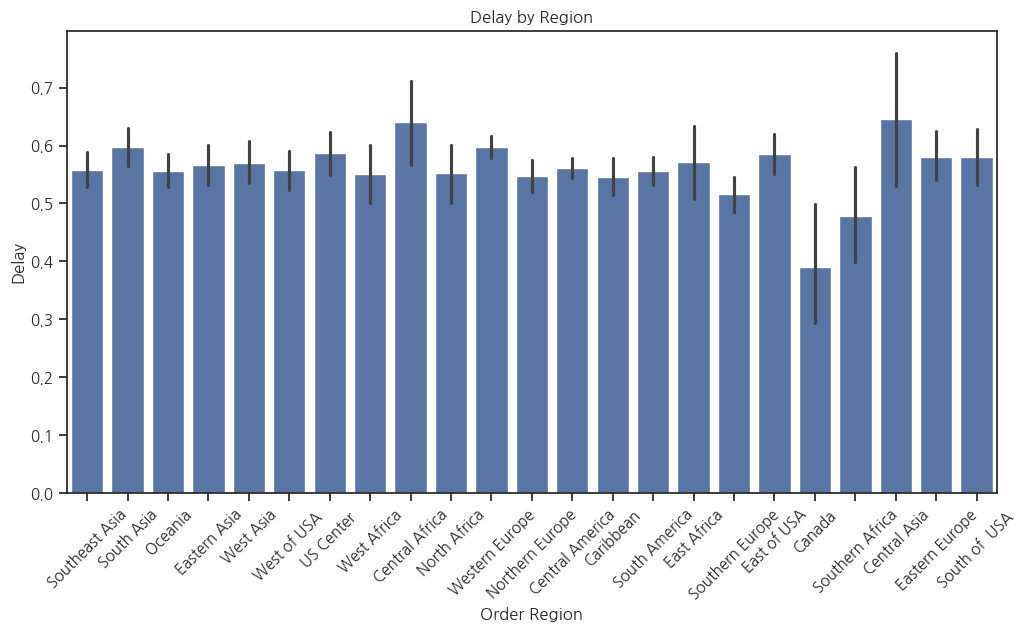

In [44]:
# 주문 지역별 배송 지연일 평균
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Region', y='Delay', data=data)
plt.title('Delay by Region')
plt.xticks(rotation=45)
plt.show()

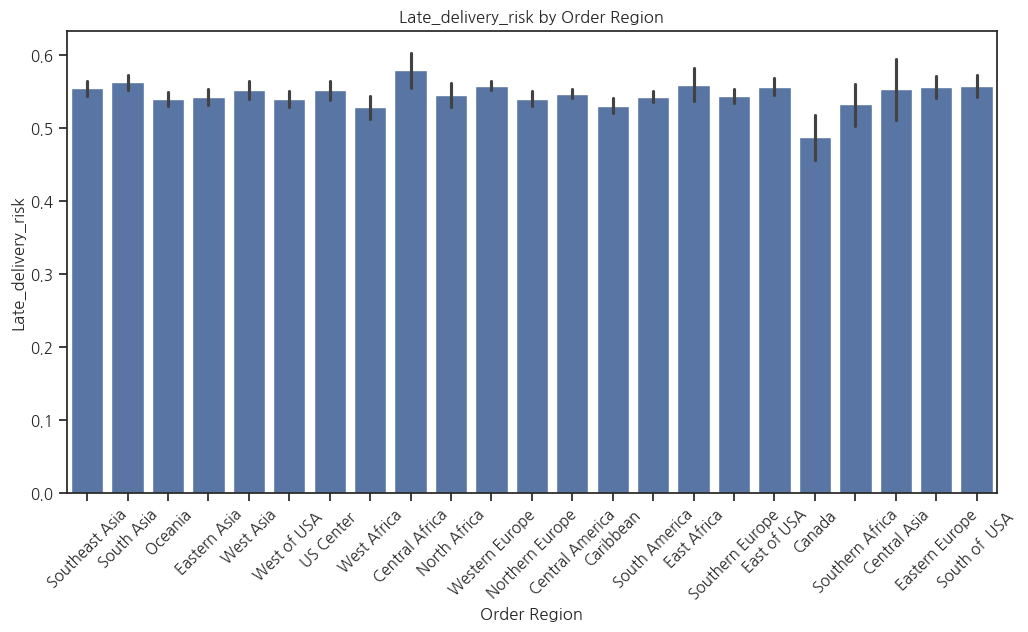

In [45]:
# 주문 지역별 배송 지연 비율(0에서 1)
plt.figure(figsize=(12, 6))
sns.barplot(x='Order Region', y='Late_delivery_risk', data=data)
plt.title('Late_delivery_risk by Order Region')
plt.xticks(rotation=45)

plt.show()

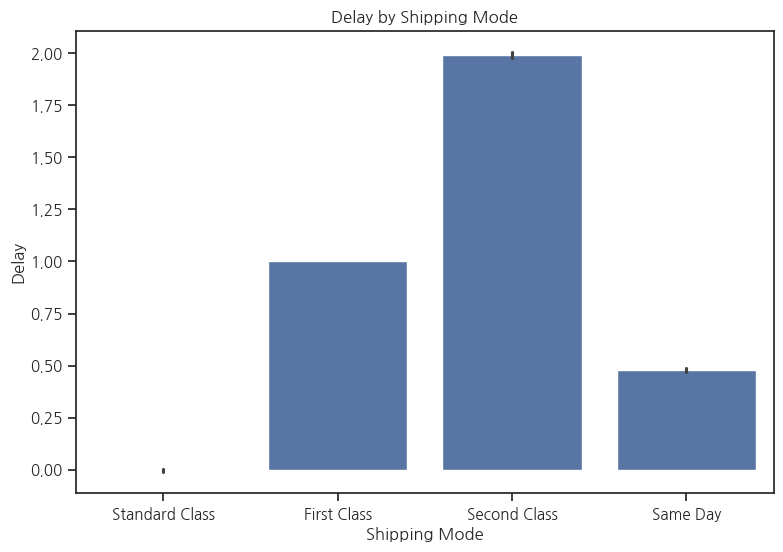

In [46]:
# 배송 유형별 배송 지연일 평균
plt.figure(figsize=(9, 6))
sns.barplot(x='Shipping Mode', y='Delay', data=data)
plt.title('Delay by Shipping Mode')
plt.xticks(rotation=0)
plt.show()

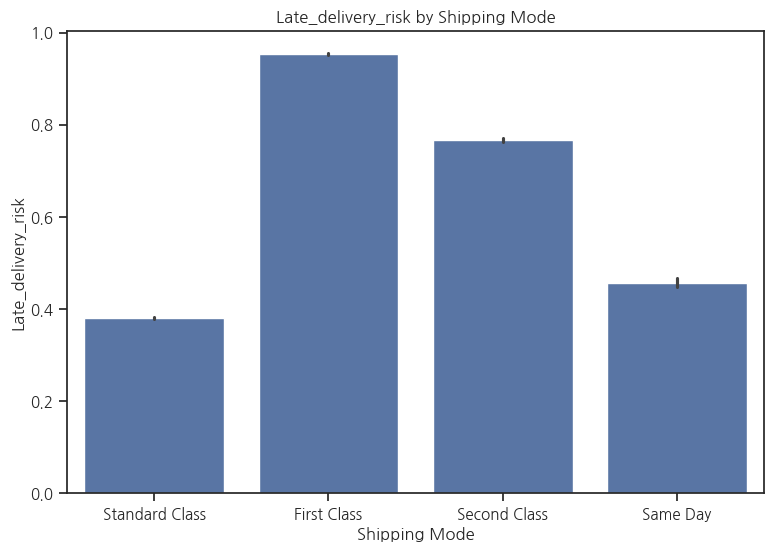

In [47]:
# 배송 유형별 배송 지연 비율(0에서 1)
plt.figure(figsize=(9, 6))
sns.barplot(x='Shipping Mode', y='Late_delivery_risk', data=data)
plt.title('Late_delivery_risk by Shipping Mode')
plt.xticks(rotation=0)

plt.show()

1. 골프백, 카트의 지연 비율과 지연일 평균이 다소 높게 나타난 것으로 제외하면 눈에 띄는 결과는 없음
2. 미국에서 가까운 캐나다의 지연 비율과 지연일 평균이 다소 낮게 나타난 것을 제외하면 눈에 띄는 결과는 없음
3. 직관과는 반대로 배송 지연일 평균은 second class가, 배송 지연 비율은 first class가 가장 높음.
특히 first class는 거의 100%에 가까운 지연 비율을 보이고 있음.
-> 이를 설명할 수 있는 가설은?
-> 배송유형별 거리/예정시간의 차이가 배송 지연 분포에 영향을 줄 것으로 보임.
   즉, 배송이 오래 걸리거나 애로사항이 있는 경우에 높은 등급의 배송서비스를 이용하므로
   오히려 배송 지연의 정도가 높은 등급일 수록 크게 나타난다고 가정해볼 수 있음.
   이를 검증하기 위해서는 배송 유형별로 예정시간의 분포를 살펴봐야 함.

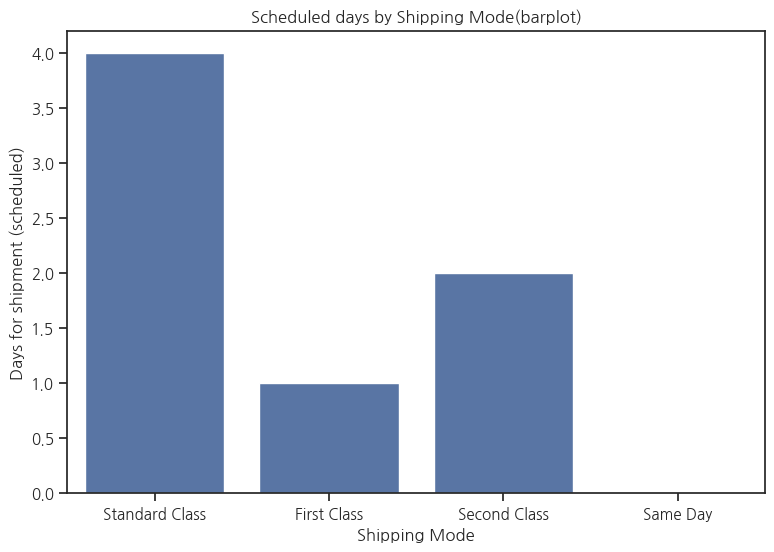

In [98]:
# 배송유형별 예정 배송기간 1
plt.figure(figsize=(9, 6))
sns.barplot(x='Shipping Mode', y='Days for shipment (scheduled)', data=data)
plt.title('Scheduled days by Shipping Mode(barplot)')
plt.xticks(rotation=0)
plt.show()

<Figure size 900x600 with 0 Axes>

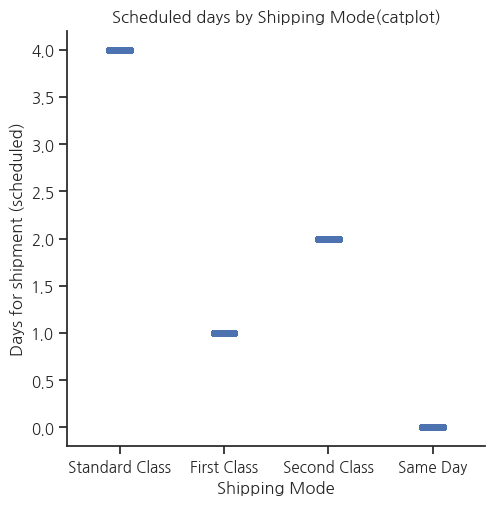

In [102]:
# 배송유형별 예정 배송기간 2
plt.figure(figsize=(9, 6))
sns.catplot(x='Shipping Mode', y='Days for shipment (scheduled)', data=data)
plt.title('Scheduled days by Shipping Mode(catplot)')
plt.xticks(rotation=0)
plt.show()

각 배송 유형의 등급별 예정 시간은 일률적으로 지정되어 있음을 확인함(First - 1일, Second - 2일, Standard - 4일)

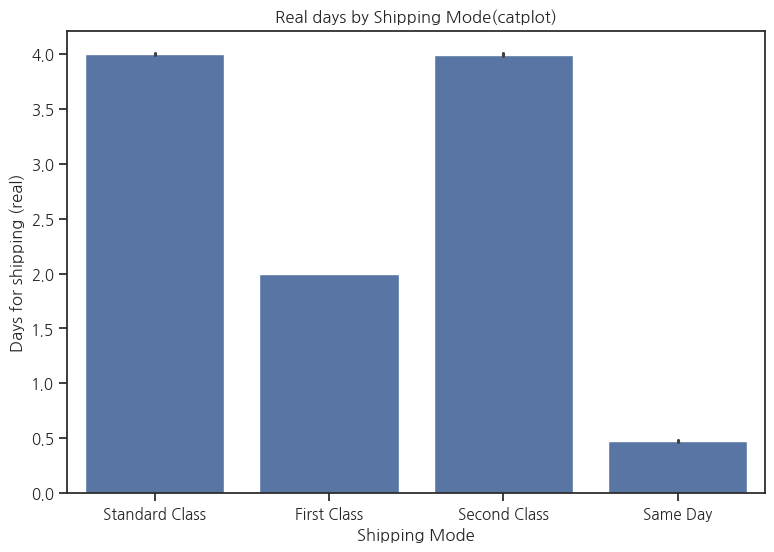

In [111]:
# 배송유형별 실제 배송소요기간 1
plt.figure(figsize=(9, 6))
sns.barplot(x='Shipping Mode', y='Days for shipping (real)', data=data)
plt.title('Real days by Shipping Mode(catplot)')
plt.xticks(rotation=0)
plt.show()

<Figure size 900x600 with 0 Axes>

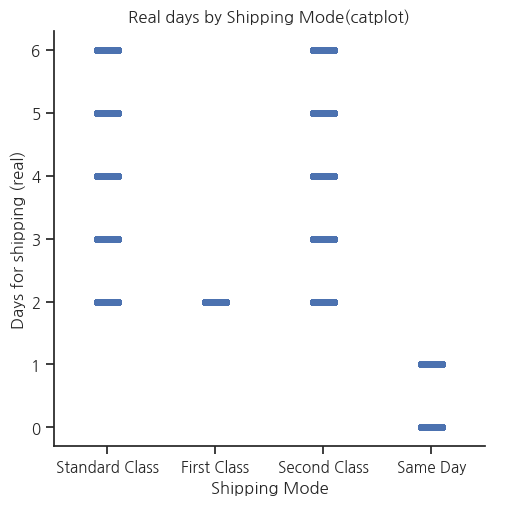

In [109]:
# 배송유형별 실제 배송소요기간 2
plt.figure(figsize=(9, 6))
sns.catplot(x='Shipping Mode', y='Days for shipping (real)', data=data)
plt.title('Real days by Shipping Mode(catplot)')
plt.xticks(rotation=0)
plt.show()

1. 예정 소요 시간에 비해 실제 소요 시간은 다양한 변수에 의해 달라지는 모습을 보였으나, 
    First Class는 일괄적으로 2일(예정 +1일)이 소요되고 있음
2. 또한 Second Class는 비해 실제 소요 기간의 분포가 비교적 분산된 모습을 보이고 있으며,
   Standard Class와 큰 차이가 없는 모습을 보임(정확히는 count해봐야 알 것 같음)
-> 이는 고객 만족도 이슈로 이어질 수 있어 실제 성과를 개선하던지, Class 분류를 다시해야할 것으로 보임